# Import packages needed for mappdf demo

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import pearsonr

from diffpy.pdfgetx import PDFGetter, PDFConfig

# utils for mapPDF
from utils import *

# bSeabornStyle()

# Define filepath to informations

In [2]:
# defined example files
meta_data_fp = 'meta/20161115-220716_grid_scan_md2.txt'
chi_dir = 'chi/'


# Load raw I(Q) data

In [4]:
pdf_params = dict(qmaxinst=17, qmin=0.8, qmax=17, dataformat='Qnm',
                   rmin=0.0, rmax=100.0, rstep=0.01)
# load lookup table
# optional; to exclude function
qoi_colmns  = ['diff_x', 'diff_y', 'filename', 'composition']
df = mappdf_load_chi(meta_data_fp, qoi_columns=qoi_colmns, root=chi_dir)
# process the data
process_chi_df(df, pdf_params, 
               background=5, iq_pearson_data=5, gr_pearson_data=5)

1.73185619456


/home/christopher/dev/mappdf/demo/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **pdf_parameters)[1]


In [5]:
# view the first 5 rows for example
df.head()

,diff_x,diff_y,filename,composition,q,iq,iq_pearson,corrected_iq,gr,gr_pearson
0,9.4,25.44,Catalyst_Array_DenseMap_075785_0001.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.7301698, 5.7302208...",0.992205,"[-5.0, -5.0, -5.0, -5.0, -5.0, 0.7301698, 0.73...","[0.0, 0.000210682320673, 0.000415885633616, 0....",0.997211
1,9.4,24.44,Catalyst_Array_DenseMap_075785_0002.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 4.0435905, 4.0436268...",0.999389,"[-5.0, -5.0, -5.0, -5.0, -5.0, -0.9564095, -0....","[0.0, 0.000203006689069, 0.000400759686348, 0....",0.998162
2,9.4,23.44,Catalyst_Array_DenseMap_075785_0003.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.0133491, 5.0133934...",0.999855,"[-5.0, -5.0, -5.0, -5.0, -5.0, 0.0133491, 0.01...","[0.0, 0.000519379691356, 0.00102417225504, 0.0...",0.998386
3,9.4,22.44,Catalyst_Array_DenseMap_075785_0004.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 4.7433209, 4.7433634...",0.999668,"[-5.0, -5.0, -5.0, -5.0, -5.0, -0.2566791, -0....","[0.0, 0.000454213294865, 0.000895793107484, 0....",0.998307
4,9.4,21.44,Catalyst_Array_DenseMap_075785_0005.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.9600918, 3.9601269...",0.999868,"[-5.0, -5.0, -5.0, -5.0, -5.0, -1.0399082, -1....","[0.0, 0.000349015491696, 0.000688494400368, 0....",0.998737


# Pearson map of I(Q) wrt backgrounds for first screening 

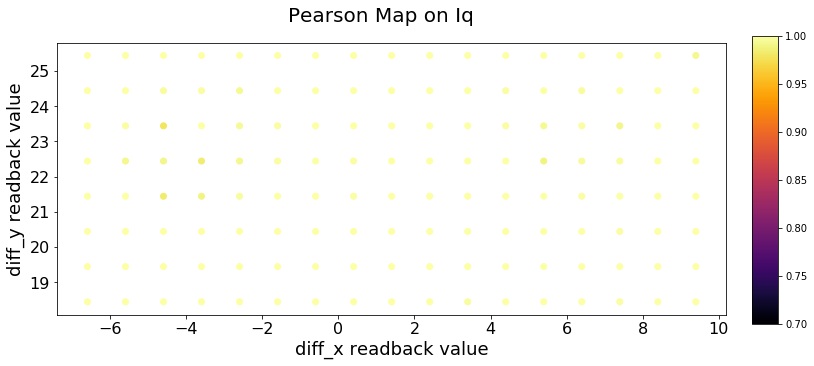

In [6]:
# create scatter plot with pearson map

# Setup plotting
plt.set_cmap('inferno')
fig, ax = plt.subplots(1,1, figsize=(12, 5), sharey=True)
fig.suptitle('Pearson Map on Iq', fontsize=20)
cax = fig.add_axes((0.93,0.1,0.03,0.8))
ax.set_ylabel('diff_y readback value')
ax.set_xlabel('diff_x readback value')
conf_label_size(ax, 18)
conf_tick_size(ax, 16)

# Plot the data 
im = ax.scatter(df['diff_x'], df['diff_y'], c=df['iq_pearson'], vmin=.7)
fig.colorbar(im, cax=cax)

# Pearson map of G(r)

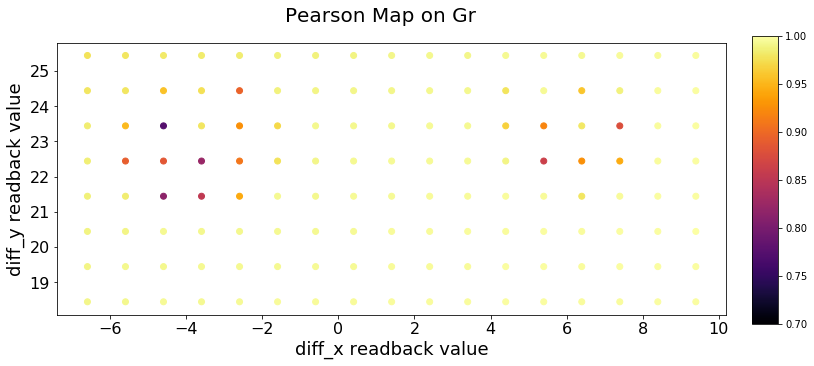

In [7]:
# create scatter plot with pearson map
# Setup plot
plt.set_cmap('inferno')
fig, ax = plt.subplots(1,1, figsize=(12, 5), sharey=True)
fig.suptitle('Pearson Map on Gr', fontsize=20)
cax = fig.add_axes((0.93,0.1,0.03,0.8))
ax.set_ylabel('diff_y readback value')
ax.set_xlabel('diff_x readback value')
conf_label_size(ax, 18)
conf_tick_size(ax, 16)

# Plot data
im = ax.scatter(df['diff_x'], df['diff_y'], c=df['gr_pearson'], vmin=.7)
fig.colorbar(im, cax=cax)